In [23]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

import sys
import os
# Add the parent directory to Python path to find the modules folder
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
str_pi = "\u03C0"

from modules.models import Yao_Kivelson
from modules.support_functions import create_anyons, plot_system, path_anyon_dict_2_path
from modules.braiding_functions import compute_braiding_single_step
from Braiding_YK_model.plotting_functions import plot_energy_spectrum, plot_zero_modes, plot_local_anyon_basis

### Define parameters

In [17]:
#### Define the system parameters
g = 4
alpha = 0.25*np.pi
G = g
L = 8
pbc = False
add_b_site = False # to add the extra site at the boundary for odd N_sites in open boundary condition. NOT OF USE FOR PBC and YAO-KIVELSON MODEL --- IGNORE ---
W = 0
u = 0
syst_params = {'G':G, 'L': L, 'W':W, 'u':u, 'pbc':pbc, 'add_b_site':add_b_site}
t = np.abs(np.sin(alpha))
J = np.abs(np.cos(alpha))
hop_params = {'ty':1j*t, 'tx':1j*t, 'tz':1j*t, 'Jy':1j*J, 'Jx':1j*J, 'Jz':1j*J}



#### Define the anyon parameters

anyon_loop_indices = [100,137,93,147]


#### Define Braiding path parameters

## path 1: Double exchange of anyons in interesecting path in PBC
path_anyon_dict = {0:[93,35], 1:[35,120], 2:[120,59], 3:[147,78], 4:[78,35], 5:[35,153], 6:[153,90], 7:[59,120], 8:[120,35], 9:[35,93], 10:[90,153], 11:[153,35], 12:[35,78], 13:[78,147]}
N_path = len(path_anyon_dict)

### Initialize the model

Number of sites: 367


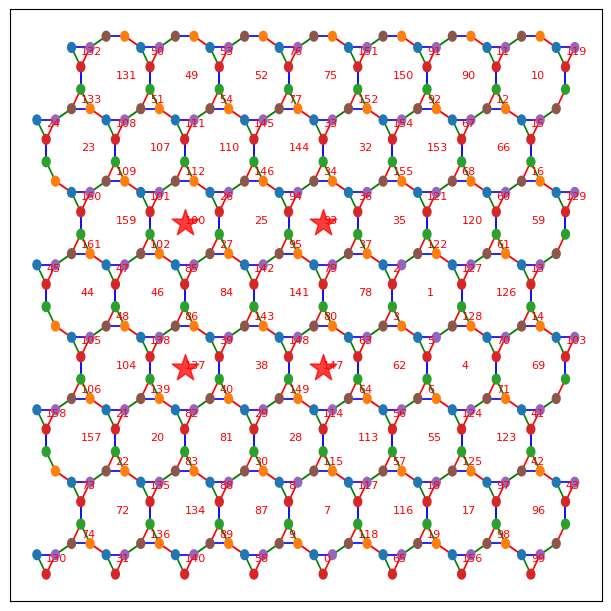

In [3]:
model = Yao_Kivelson(syst_params=syst_params, hop_params = hop_params)
print('Number of sites:', model.N_sites)

#### set kwant_style=True to see the sub-lattice structure
fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
plot_system(model, anyon_loop_indices, ax, show_loop_indices=True, kwant_style=True, show_bond_indices=False)
plt.show()

### Check the spectrum both in OBC and PBC

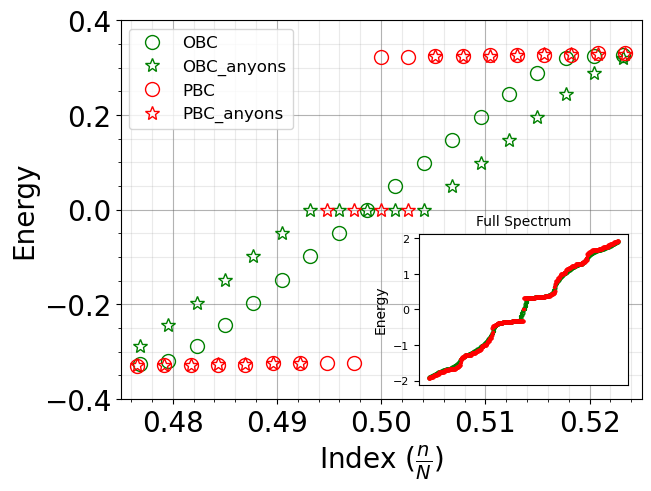

In [4]:
fig, ax = plt.subplots(constrained_layout=True)
plot_energy_spectrum(syst_params=syst_params, hop_params=hop_params, anyon_loop_indices=anyon_loop_indices, ax=ax)
plt.show()

### Check the localization of the zero modes

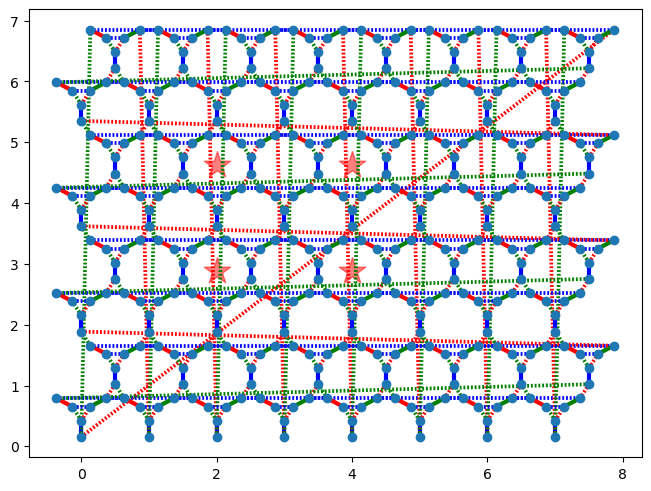

Number of zero modes: (np.int64(194), np.int64(190), np.int64(4))


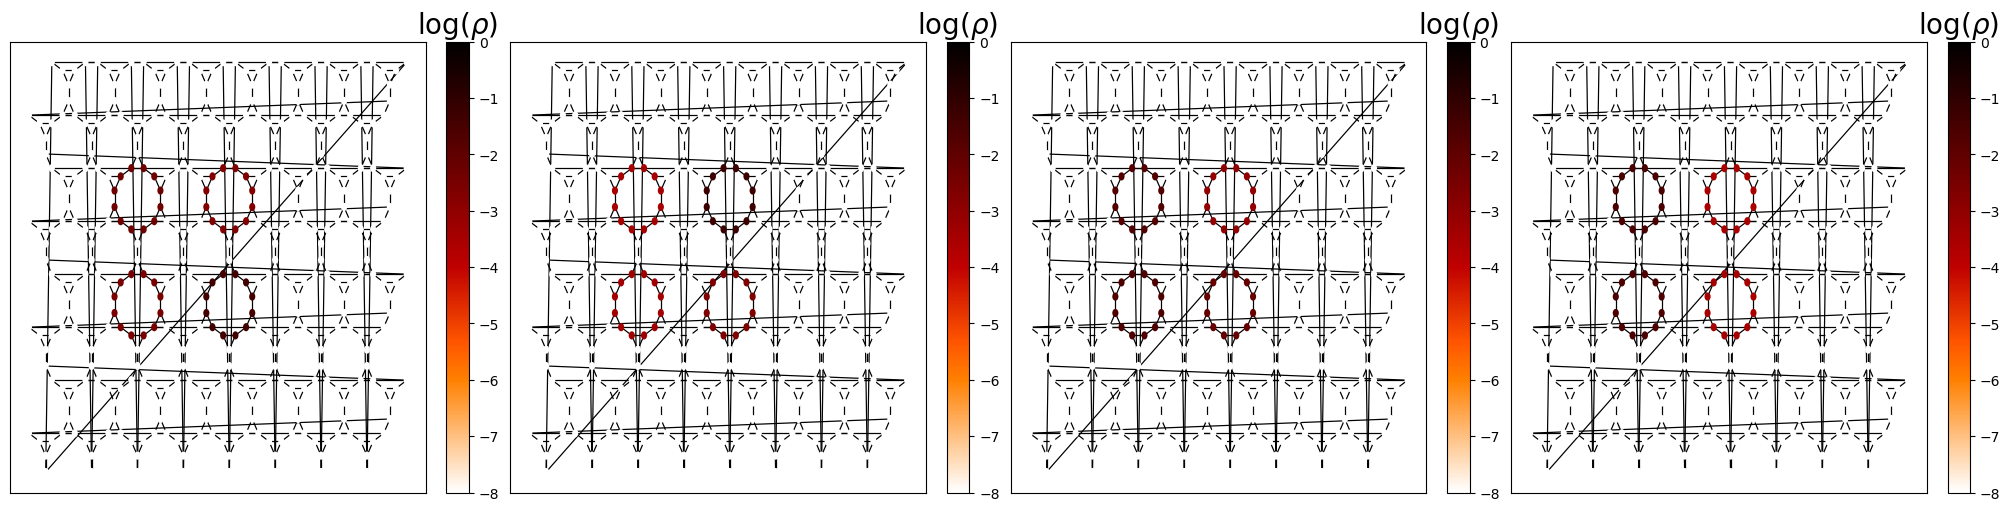

In [5]:
plot_zero_modes(syst_params=syst_params, hop_params=hop_params, anyon_loop_indices=anyon_loop_indices, pbc=True)

### Transform into the local basis for zero modes

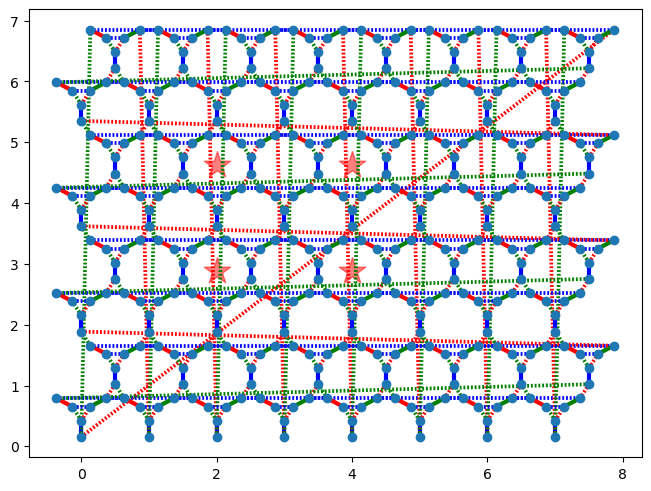

perm: True
inverse_perm: True
E-val_check: True


/Users/saswat/Projects/CSL_sierpinski/Codes/modules/braiding_functions.py:93: RuntimeWarning:

divide by zero encountered in log



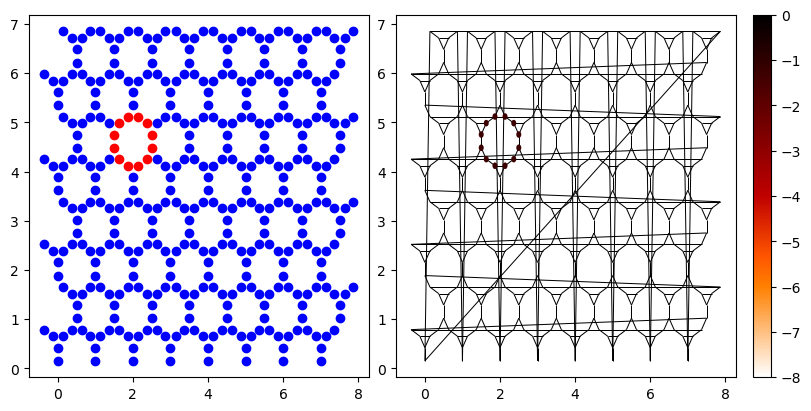

perm: True
inverse_perm: True
E-val_check: True


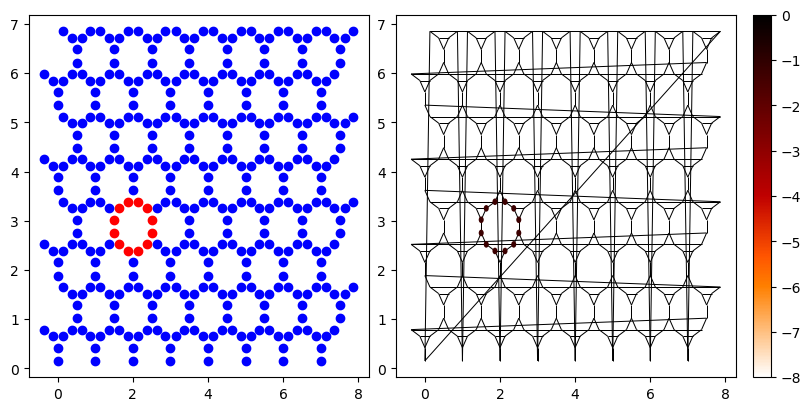

perm: True
inverse_perm: True
E-val_check: True


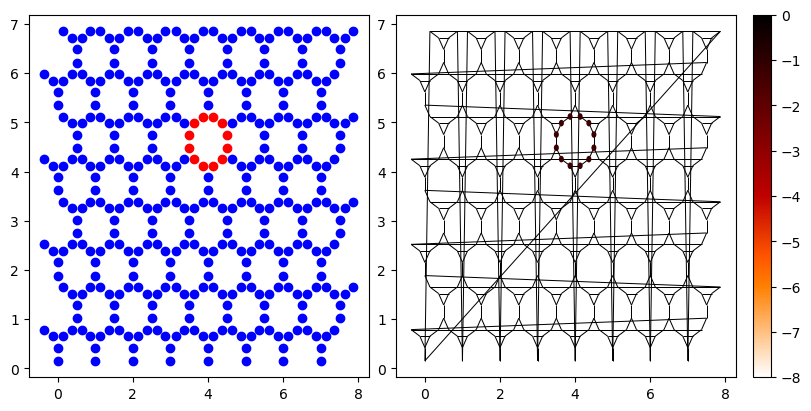

perm: True
inverse_perm: True
E-val_check: True


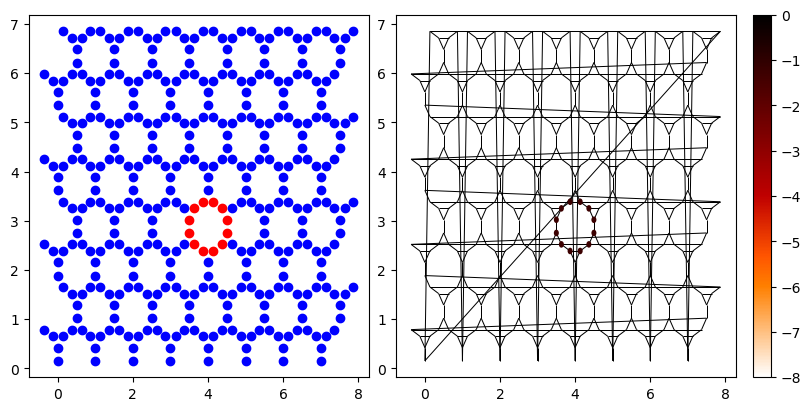

Number of zero modes: (np.int64(194), np.int64(190), np.int64(4))


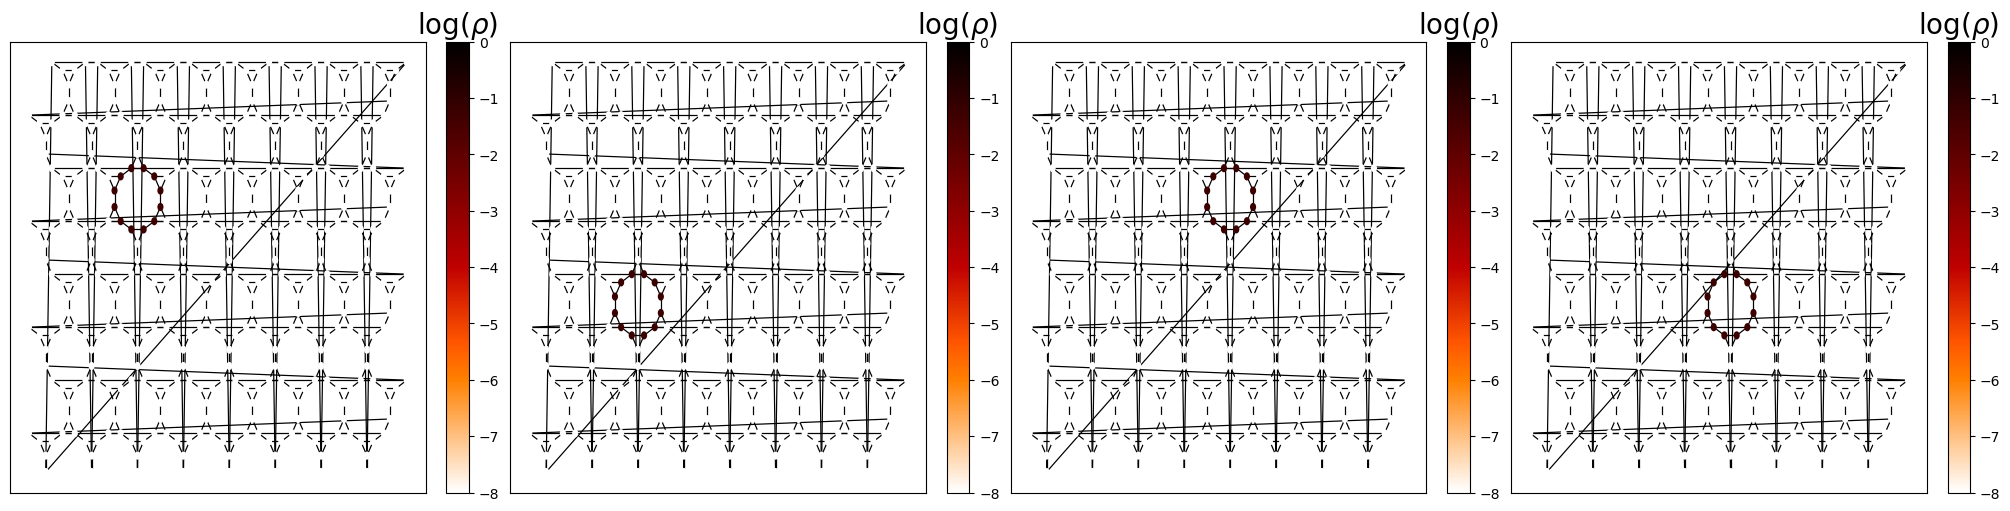

In [ ]:
plot_local_anyon_basis(syst_params=syst_params, hop_params=hop_params, anyon_loop_indices=anyon_loop_indices)

### Compute overlap for a single braiding step

In [20]:
def test_single_braiding_step(path_anyon_dict, ind_step, N_steps, i_path, check=False, plot_anyons=False):
    """
    Tests a single braiding step of the system.

    Parameters
    ----------
    model : model class for the system
        Representation of the system. msys.syst must be a kwant builder
    
    """
    syst_params['pbc'] = True
    model = Yao_Kivelson(syst_params=syst_params, hop_params=hop_params)
    create_anyons(msys=model, anyon_loop_indices=anyon_loop_indices)
    # print('Number of sites:', model.N_sites)

    path = path_anyon_dict_2_path(msys=model, path_anyon_dict=path_anyon_dict)
    if check:
        print(f'Braiding path: {path}')
        print(f'Number of steps in the path: {len(path)}')
        print(f'i_path={i_path}, ind_step={ind_step}, N_steps = {N_steps}')

    X = compute_braiding_single_step(msys=model, anyon_loop_indices=anyon_loop_indices, path=path, path_anyon_dict=path_anyon_dict, i_path=i_path, ind_step=ind_step,N_steps= N_steps, check=check, plot_anyons=plot_anyons)

    return X


#### One can play around with ind_step, N_steps and i_path to test a single braiding step and visulize the anyon movement. 
#### To get the plots for anyons movement, set check=True and plot_anyons=True

ind_step = 0 
N_steps = 50
i_path = 5
overlap = test_single_braiding_step(path_anyon_dict=path_anyon_dict, ind_step=ind_step, N_steps=N_steps, i_path=i_path)
print(f'Norm of the overlap matrix: {np.linalg.norm(overlap)}')

Norm of the overlap matrix: 1.4140359391949036


### Loop over all ind_steps and i_path to get the full overlap matrix

In [ ]:
#### THIS CELL BLOCK MIGHT TAKE SOME TIME. FOR EXAMPLE, FOR 4 ANYONS, 50 STEPS AND 14 PATHS, IT TAKES ABOUT 350 SECONDS.

N_steps = 50 
t0 = time()
norm_overlap_list = []
overlap_list = []
for i_path in range(len(path_anyon_dict)):
    t0_path = time()    
    for ind_step in range(1, N_steps+1):
        overlap = test_single_braiding_step(path_anyon_dict=path_anyon_dict, ind_step=ind_step, N_steps=N_steps, i_path=i_path, check=False)
        overlap_list.append(overlap)
        norm_overlap_list.append(np.linalg.norm(overlap))
    t1_path = time()
    print(f'Completed braiding path {i_path+1} out of {len(path_anyon_dict)}: Time taken: {t1_path - t0_path} seconds')
t1 = time()
print(f'\nTime taken for {N_steps*len(path_anyon_dict)} steps: {t1-t0} seconds\n')

Completed braiding path 1 out of 14: Time taken: 22.859925985336304 seconds
Completed braiding path 2 out of 14: Time taken: 22.937692880630493 seconds
Completed braiding path 3 out of 14: Time taken: 22.881037950515747 seconds
Completed braiding path 4 out of 14: Time taken: 22.881139993667603 seconds
Completed braiding path 5 out of 14: Time taken: 22.949398040771484 seconds
Completed braiding path 6 out of 14: Time taken: 22.856176137924194 seconds
Completed braiding path 7 out of 14: Time taken: 22.915975093841553 seconds
Completed braiding path 8 out of 14: Time taken: 22.936120986938477 seconds
Completed braiding path 9 out of 14: Time taken: 22.892807245254517 seconds
Completed braiding path 10 out of 14: Time taken: 22.930279970169067 seconds
Completed braiding path 11 out of 14: Time taken: 22.8816978931427 seconds
Completed braiding path 12 out of 14: Time taken: 22.891441345214844 seconds
Completed braiding path 13 out of 14: Time taken: 22.915169954299927 seconds
Completed 

N_steps: 50, N_path: 14, Total steps: 700


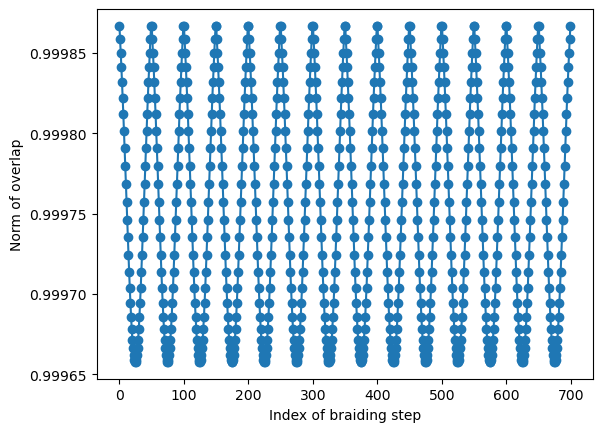

In [21]:
print(f'N_steps: {N_steps}, N_path: {N_path}, Total steps: {N_steps*N_path}')
plt.plot(range(N_path * N_steps), 1/np.sqrt(2) * np.array(norm_overlap_list), '-o')
plt.xlabel('Index of braiding step')
plt.ylabel('Norm of overlap')
plt.show()

In [26]:
from functools import reduce
from numpy import matmul
total_flux = reduce(matmul, overlap_list)
print(f'Total flux matrix:\n Absolute:{np.abs(total_flux)}\n' f'Angle: {str_pi} * {np.angle(total_flux)/np.pi} \n')

Total flux matrix:
 Absolute:[[8.40138397e-01 3.54996667e-14]
 [4.45030931e-14 8.40138397e-01]]
Angle: π * [[-0.50005044  0.94143905]
 [ 0.97496018 -0.50005044]] 

